In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 


In [2]:
df_index=pd.read_csv("economic_index.csv")
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [3]:
#drop the unnecessary columns 
df_index.drop(columns=['year','month'],inplace=True)
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [4]:
#check null value s
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

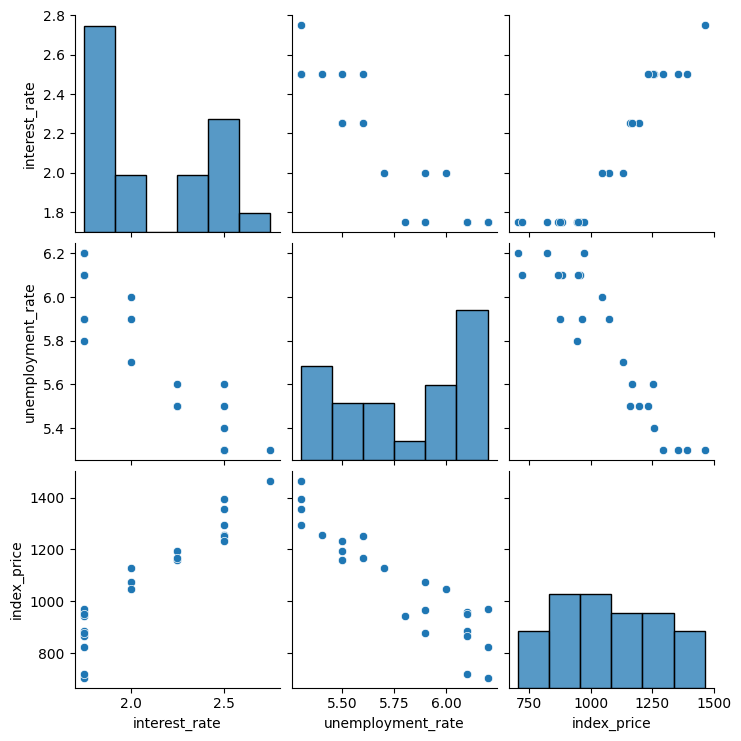

In [5]:
#visualization
import seaborn as sns 
sns.pairplot(df_index)

In [6]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployemnet_rate')

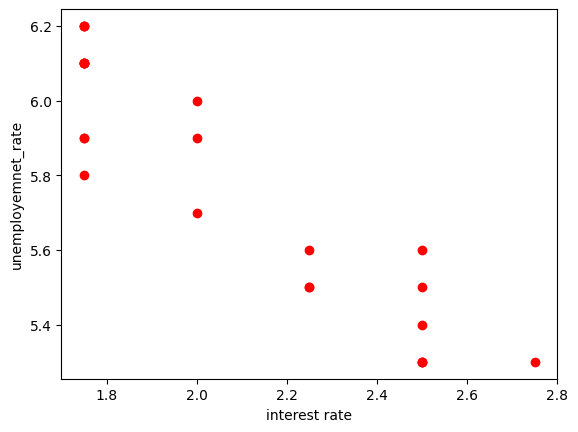

In [7]:
#visualize the datapoints more closely 
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployemnet_rate")

In [9]:
#independe & dependent featres 
x=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']

In [10]:
#train test split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

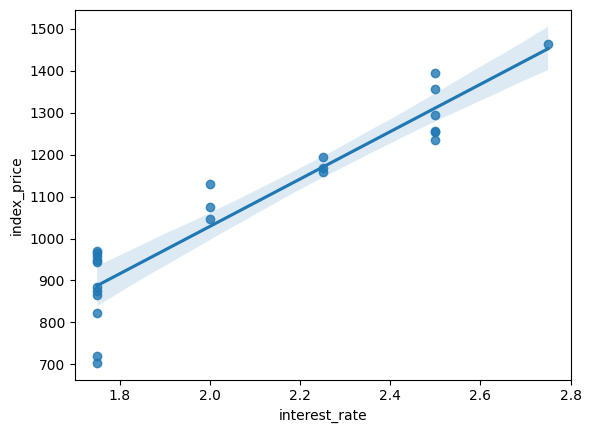

In [18]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])



<Axes: xlabel='unemployment_rate', ylabel='index_price'>

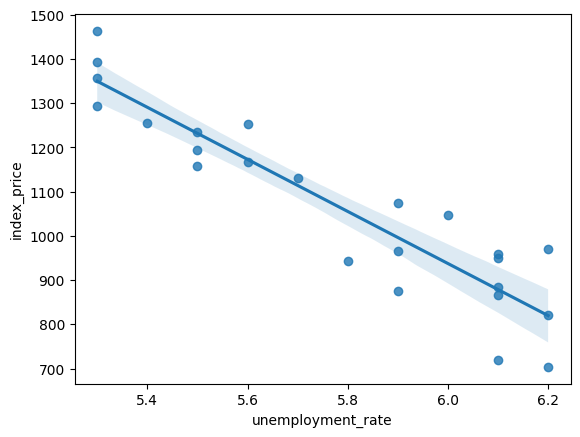

In [16]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

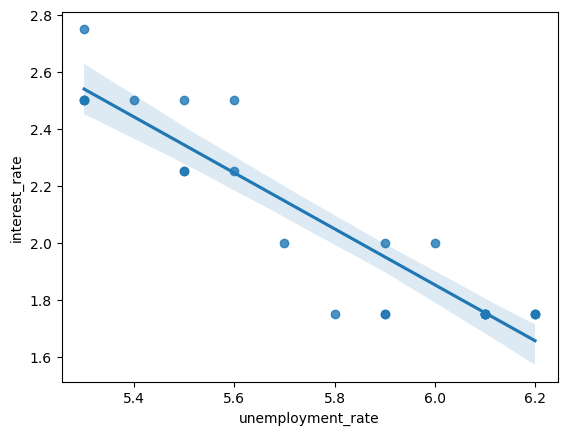

In [17]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['interest_rate'])

In [19]:
#standardization
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression() 
regression.fit(x_train,y_train)


LinearRegression()

In [22]:
#cross validation
from sklearn.model_selection import cross_val_score 
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)
validation_score


array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [23]:
#mean or avergae 
np.mean(validation_score)

np.float64(-5914.828180162388)

In [24]:
#predicioon
y_pred=regression.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [28]:
#performance metric 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5793.762887712569
59.935781523235484
76.11677139574805


In [29]:
#r2 
from sklearn.metrics import r2_score 
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [31]:
#adjusted r square 
1-(1-score)*(len(y_test)-1)/((len(y_test)-x_test.shape[1]-1))

0.7131630152428576

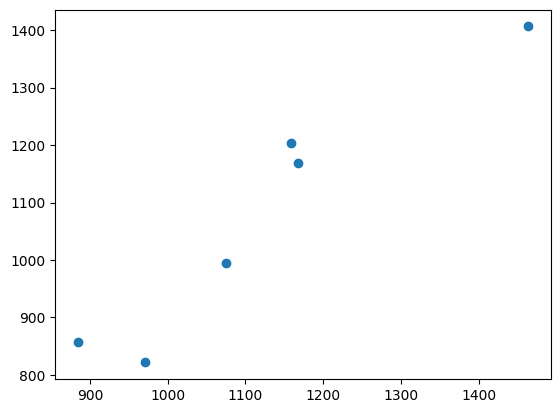

In [32]:
#assumptions
plt.scatter(y_test,y_pred)
#model is true becase it has the linear relationshsipt between y_pred and y_test

In [33]:
residuals=y_test-y_pred
residuals

##index  diffrenc table will gives results

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

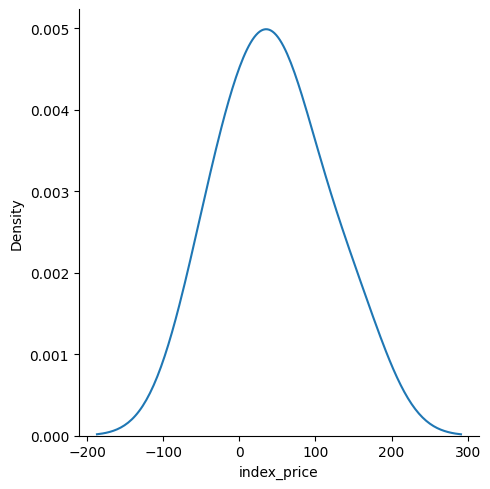

In [34]:
sns.displot(residuals,kind="kde")
#diagrom is normal distribution so the model is good fit

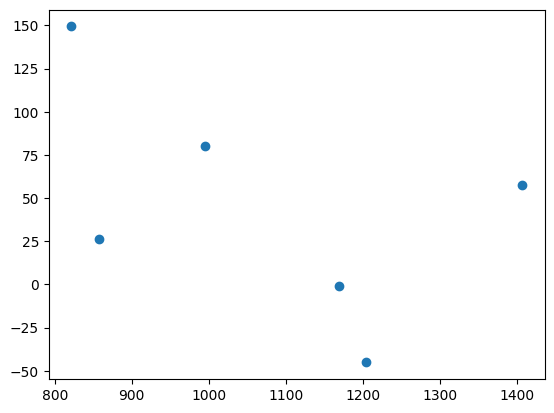

In [36]:
#scatter plot with y_pred and residuals 
plt.scatter(y_pred,residuals)
#unifrom distribution is good 

In [39]:

import statsmodels.api as sm 
model=sm.OLS(y_train,x_train).fit()


In [42]:
prediction=model.predict(x_test)
print(prediction) 
model.summary()


[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 02 Nov 2024   Prob (F-statistic):                       0.754
Time:                        11:23:08   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print(regression.coef_) 
regression.intercept_

[  88.27275507 -116.25716066]


np.float64(1053.4444444444443)